<a href="https://colab.research.google.com/github/DsRaul/CH-ProjectFinal/blob/main/proyecto_final_entrega_19-02-2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP Entrega Final Data Science

## Analisis de Perdida de clientes de telecomunicaciones

Participantes: Raul S. Chañe Muñoz



# 1. DEFINICION DE OBJETIVOS


Desarrollar un modelo que permita predecir la perdida de clientes en el area de telecomunicaciones

# 2. CONTEXTO COMERCIAL

Una empresa dedicada al rubro de telecomunocaciones.


# 3. PROBLEMA COMERCIAL


Detectar patrones que indiquen cuando un cliente va a renunciar a la operadora que le proporciona servicios.

# 4. CONTEXTO ANALITICO

Se dispone de los datos obtenidos de una Base de datos sobre la perdida de clientes.

#5. IMPORTACION DE DATOS Y CARGA DE DATOS

In [65]:
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [66]:
URL = 'https://raw.githubusercontent.com/DsRaul/Churn_Telecom/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [67]:
data = pd.read_csv(URL)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [68]:
type(data)

pandas.core.frame.DataFrame

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [70]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#6. ANALISIS EXPLORATORIO DATOS

### Graficamos diferentes variables, para empezar a conocer los datos que nos da el Dataset

In [71]:
%matplotlib inline

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

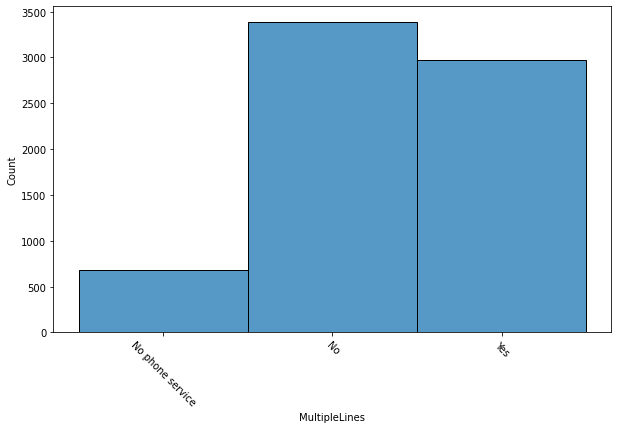

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(data['MultipleLines'])
plt.xticks(rotation = -45)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

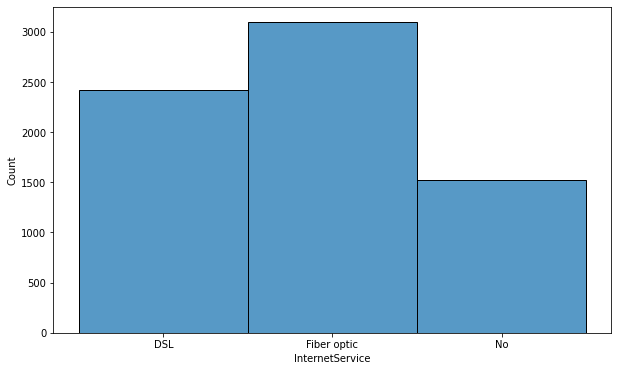

In [73]:
plt.figure(figsize=(10,6))
sns.histplot(data['InternetService'])
plt.xticks(rotation = 0)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

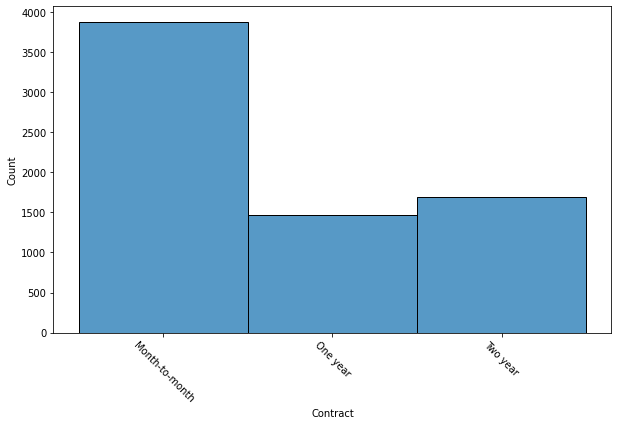

In [74]:
plt.figure(figsize=(10,6))
sns.histplot(data['Contract'])
plt.xticks(rotation = -45)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

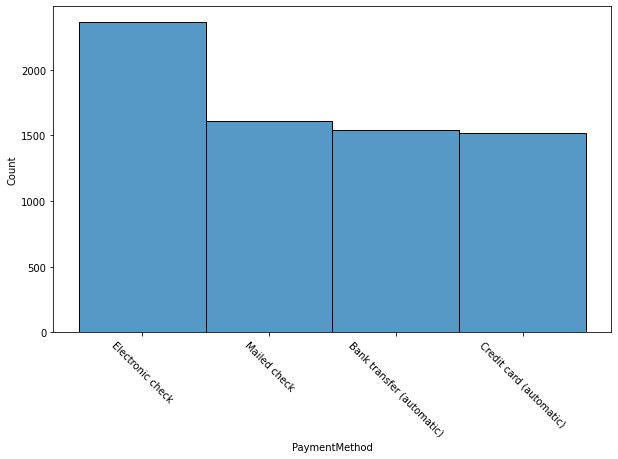

In [75]:
plt.figure(figsize=(10,6))
sns.histplot(data['PaymentMethod'])
plt.xticks(rotation = -45)

([0, 1], <a list of 2 Text major ticklabel objects>)

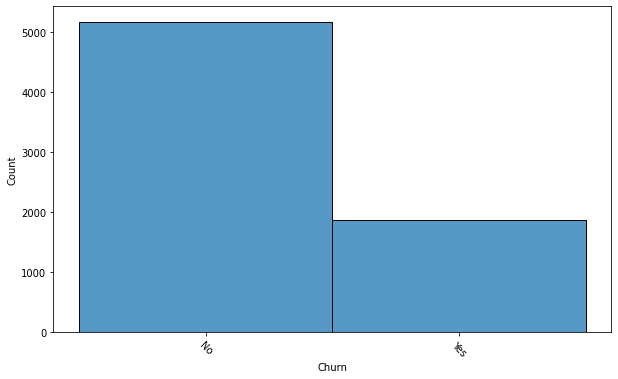

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(data['Churn'])
plt.xticks(rotation = -45)

Graficamos la relación de algunas variables con la columna Churn que es la que nos indica que clientes se fueron y cuales no.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

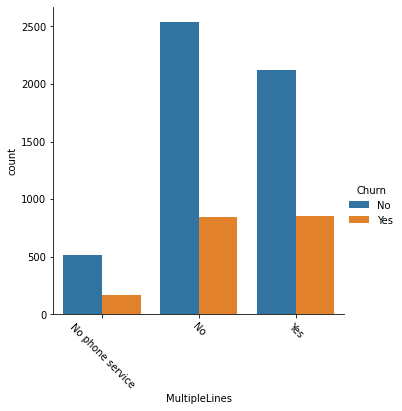

In [77]:
sns.factorplot('MultipleLines',data=data,hue='Churn',kind="count")
plt.xticks(rotation = -45)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

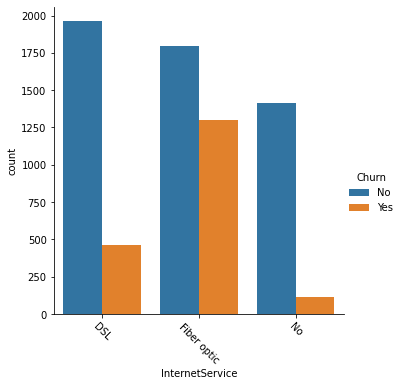

In [78]:
sns.factorplot('InternetService',data=data,hue='Churn',kind="count")
plt.xticks(rotation = -45)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

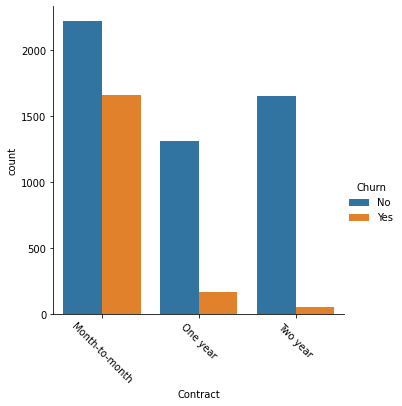

In [79]:
# Apartir de esta grafica podemos determinar los que poseen contrato de mes-mes son las personas que suelen abandonar.
sns.factorplot('Contract',data=data,hue='Churn',kind="count")
plt.xticks(rotation = -45)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

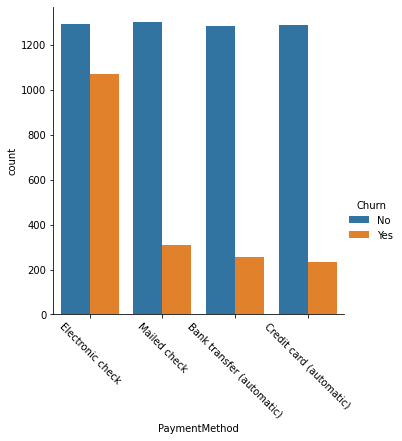

In [80]:
sns.factorplot('PaymentMethod',data=data,hue='Churn',kind="count")
plt.xticks(rotation = -45)

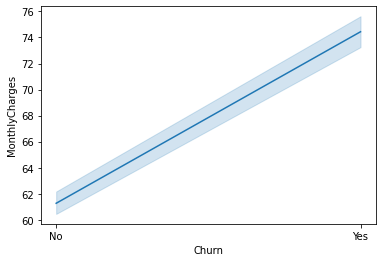

In [81]:
#Generamos la relación entre costos y perdida de clientes
sns.lineplot(data=data, x='Churn', y='MonthlyCharges')

In [82]:
ch = data['Churn'].value_counts()
sexo = ['Female', 'Male']

([<matplotlib.patches.Wedge at 0x7ff8be0d2a30>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'Female'),
  Text(0.7393677515287918, -0.8144540060674139, 'Male')])

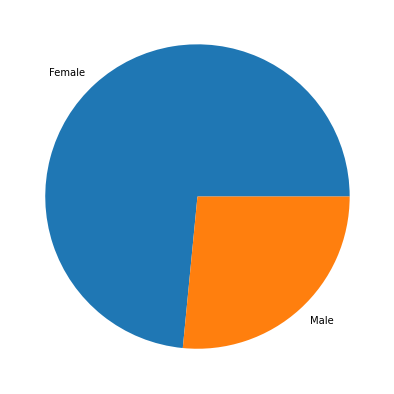

In [83]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(ch, labels = sexo)

#7. ANALISIS UNIVARIADO Y BIVARIADO

In [84]:
from statistics import mean
from statistics import median
from statistics import mode

In [85]:
## Calculamos las medidas de tendencia central
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [86]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


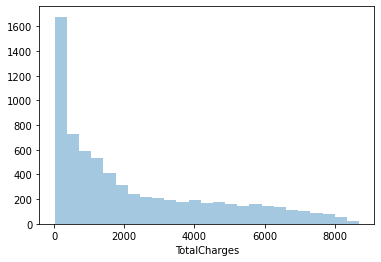

In [87]:
sns.distplot(data['TotalCharges'], kde=False) 
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


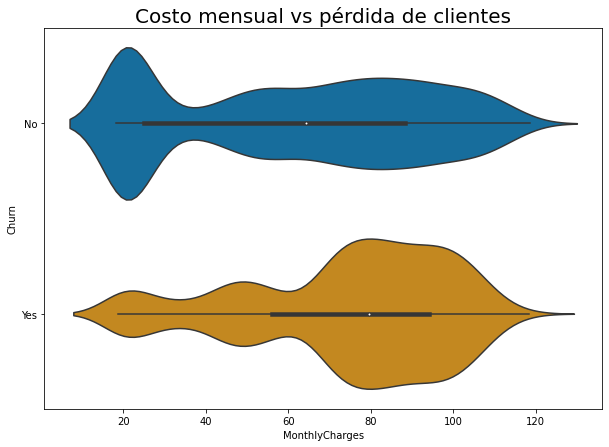

In [88]:
plt.rcParams['figure.figsize'] = (10, 7)
sns.violinplot(data['MonthlyCharges'], data['Churn'], palette = 'colorblind')
plt.title('Costo mensual vs pérdida de clientes', fontsize = 20, fontweight = 30)
plt.show()

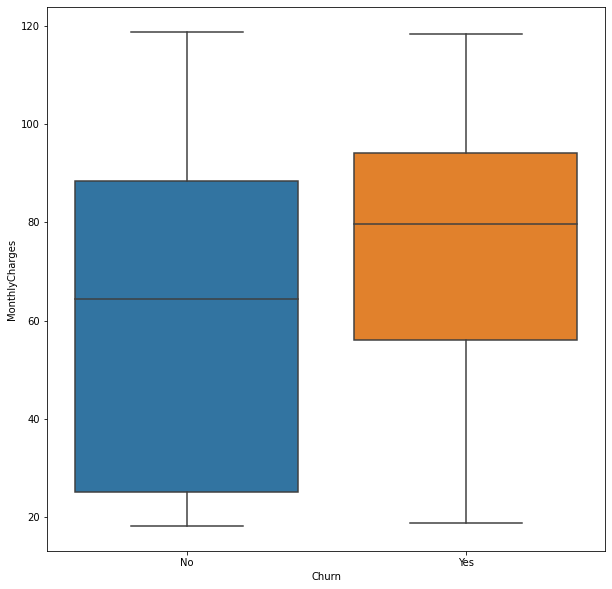

In [89]:
plt.figure(figsize=(10,10))
sns.boxplot(y = 'MonthlyCharges', x = 'Churn', data = data)
plt.show()

##Analizamos el tiempo que los clientes estuvieron y estan en la empresa

In [90]:
pd.crosstab(data.Churn, data.tenure, normalize=True)

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,0.001562,0.033082,0.016328,0.015050,0.013205,0.009797,0.009939,0.011359,0.011501,0.010365,...,0.009655,0.010791,0.009513,0.010791,0.012495,0.012921,0.012353,0.015334,0.023286,0.050547
Yes,0.000000,0.053954,0.017464,0.013347,0.011785,0.009087,0.005679,0.007241,0.005963,0.006531,...,0.000568,0.000568,0.001278,0.001846,0.001420,0.001278,0.001136,0.001562,0.000852,0.000852


##Encontramos algunos Insight que son importantes para empezar a analizar las causas de nuestra columna Churn:
1) El precio del servicio
2) El tipo de producto que el cliente tiene
3) La forma de contrato

### 3.- CREACION DE VARIABLES

In [91]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [92]:
data_1 = data.drop(['customerID'], axis=1)
data_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [93]:
data_1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data_1['Churn'].replace(to_replace='No',  value=0, inplace=True)
#Convertimos todas las variables categóricas en variables dummy
df = pd.get_dummies(data_1)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [94]:
df.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

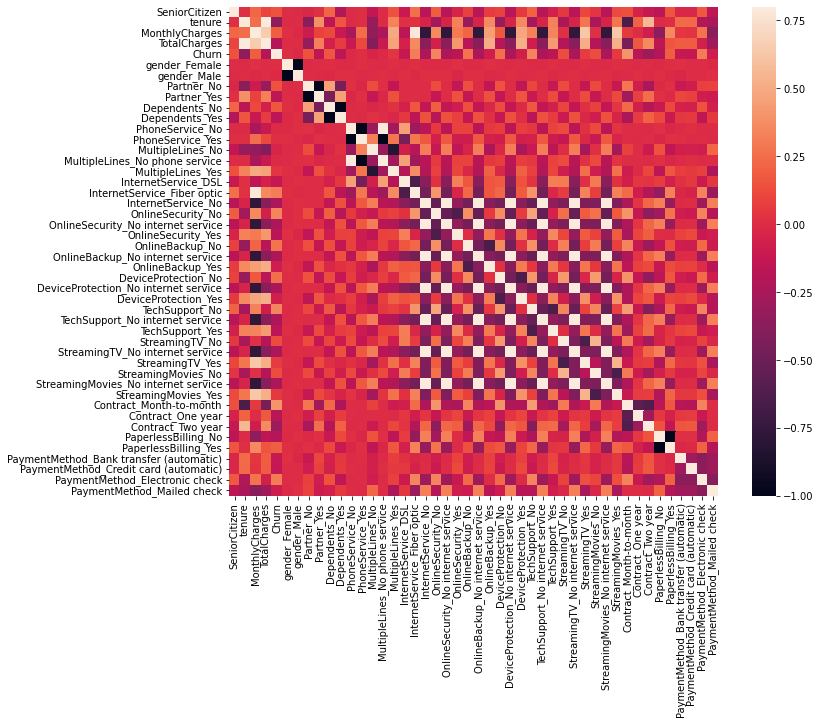

In [95]:
# Generamos la Matriz de correlación.
plt.figure(figsize=(12,9))
corrmat = df.corr()
# f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
# A partir de la grafica determinamos que variables tienen mucha mas correlacion con la columna Churn

In [96]:
df.isnull().sum()

SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [97]:
df = df.fillna(df.mean())

In [98]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [99]:
# seleccionamos las variables
x = df.drop(columns = ['Churn'])
y = df.iloc[:, 4].values  


# 8. ANALISIS DE DATOS

In [100]:
#Importamos librerias para nuestro analisis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

features = x.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(x)
x = pd.DataFrame(scaler.transform(x))
x.columns = features

REGRESION LOGISTICA

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((4930, 45), (2113, 45))

In [102]:
#Ajustamos el modelo de Logisticca Regresión con el conjunto de entrenamiento
lregression = LogisticRegression()
result = lregression.fit(x_train, y_train)

In [103]:
#Predicción de los resultados en el conjunto de testing
y_pred = lregression.predict(x_test)
print (metrics.accuracy_score(y_test, y_pred))

0.8035967818267865


In [104]:
lregression.score(x_test,y_test)

0.8035967818267865

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [106]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

0.19640321817321343

In [107]:
MSE =mean_squared_error(y_test,y_pred)
MSE

0.19640321817321343

In [108]:
RMSE = np.sqrt(MSE)
RMSE

0.44317402696143354

In [109]:
data.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [110]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [111]:
r2_score(y_test,y_pred)

-0.01647772059164465

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1399,  161],
       [ 254,  299]])

In [113]:
## Vemos el Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035967818267865

In [114]:
##Calculamos la metrica Precisión
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.65

In [115]:
##Calculamos el Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.5406871609403255

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1560
           1       0.65      0.54      0.59       553

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



Maquina de Vectores

In [132]:
from sklearn.svm import SVC

lregression.svm = SVC(kernel='linear') 
lregression.svm.fit(x_train,y_train)
preds = lregression.svm.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.794180269694819

Randon Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
rf.fit(x_train, y_train)

# Make predictions
prediction_test = rf.predict(x_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7984386089425124
